# Importing Modules

In [1]:
import import_ipynb
import CFAR_v2 as cfarv2
import GeoProcess as gp
import numpy as np
#import PreProcess_LM as lm


DATA_PATH = 'Dataset_963A/'

importing Jupyter notebook from CFAR_v2.ipynb
importing Jupyter notebook from GeoProcess.ipynb


In [2]:
# terrain_corr_product = lm.import_product('Dataset_963A/terrain_corr_subset_of_S1A_IW_GRDH_1SDV_20200825T010320_20200825T010345_034056_03F420_963A_TC.tif')
# amp_vh,amp_vv = lm.bands(terrain_corr_product)
# lm_mask_ = lm.LandMasking(terrain_corr_product,amp_vh,DATA_PATH)

10201 10596
Image Saved Succesfully.


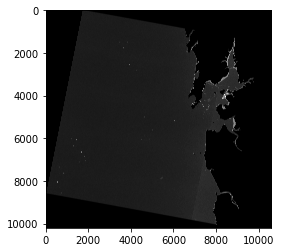

In [59]:
#Computing rows and columns
band_data_arr = gp.readGeoTiff(DATA_PATH+'LandMasked_Amplitude_VH.tif')
#subset_img = gp.readGeoTiff('Dataset_963A/CFARResults/meanfiltered_img.tif')
rows,col = band_data_arr.shape
print(rows,col)
gp.visualizeImg(band_data_arr)
#gp.save_img2Geotiff(subset_img,DATA_PATH+'CFARResults/Input.tif')

(3750, 3750)
Image Saved Succesfully.
17.638103


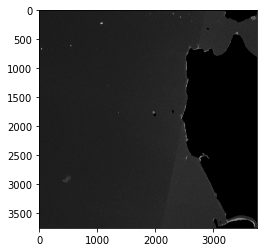

In [48]:
#subset_img = (gp.subsetImg(band_data_arr,2000,4500)) #single ship
subset_img = gp.subsetImg(band_data_arr,4950,8700) #multiple ship.

#subset_img = band_data_arr[2518:2875,3882:4282]
# # #subset_img = (ir.adjustImg(np.array(subset_img)))
print(subset_img.shape)
gp.visualizeImg(subset_img)
gp.save_img2Geotiff(subset_img,DATA_PATH+'CFARResults/Input.tif')

In [54]:
#arr = np.array(np.arange(36))
#arr = arr.reshape(6,6)
backgroundWindow_size = 88
guardWindow_size = 52
targetWindow_size = 80
pfa = 0.95

In [55]:
print("CFAR Version 2")
cfar_version2 = cfarv2.CFAR_v2(band_data_arr,targetWindow_size,guardWindow_size,backgroundWindow_size,pfa)
finalImg_version2, DV_img,T_img = cfar_version2.shipDetection()

CFAR Version 2
Kernel Ready.
Computing DVi and Threshold..



Process completed, DV image and Threshold Image succesfully Computed.




Binary Image of Ships is Succesfully Generated.



Image Saved Succesfully.


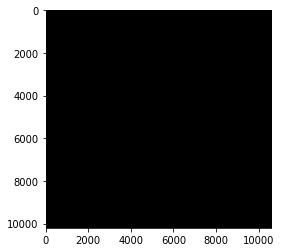

In [56]:
gp.visualizeBinaryImg(DV_img)
gp.save_img2Geotiff(DV_img,'Dataset_963A/CFARResults/Output_DVCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

Image Saved Succesfully.


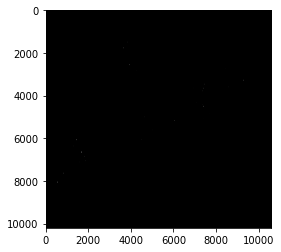

In [57]:
gp.visualizeBinaryImg(finalImg_version2)
gp.save_img2Geotiff(finalImg_version2,'Dataset_963A/CFARResults/Output_SHIPCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')

Image Saved Succesfully.


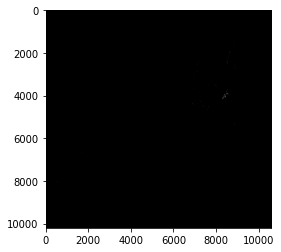

In [58]:
gp.visualizeBinaryImg(T_img)
gp.save_img2Geotiff(T_img,'Dataset_963A/CFARResults/Output_TCFARversion2'+str(backgroundWindow_size)+str(guardWindow_size)+str(targetWindow_size)+'.tif')